In [1]:
from src.data_structures import Instance
from src.solvers import ZeroReductor2,BaldoML
from random import randint
import re
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns



/usr/lib/python3.11/site-packages/torch/__init__.py:614: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /build/python-pytorch/src/pytorch-opt/torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)


In [2]:
#for instance in (Instance.generate(20000,10000 +- randint(1000,2000)) for i in range(50)):
#    print(f"{instance}")
#    print("Zero: ",ZeroReductor2.solve(instance,0.25))
#    print("Baldo: ",BaldoML.solve(instance))

In [3]:
data = open("big_results.txt","r")
lines = list(map(lambda line: line.strip('\n'),data.readlines()))

In [11]:

patron = r"(\w+): *of:([\d.]+), *time:([\d.]+)"

todo = []
for i in range(len(lines)//3):
    instancia = []
    indice = i*3
    zero = re.match(patron,lines[indice+1])
    baldo = re.match(patron,lines[indice+2])

    zero = [float(zero.groups()[1]) ,float(zero.groups()[2])]
    baldo = [float(baldo.groups()[1]) ,float(baldo.groups()[2])]
    instancia.append(zero)
    instancia.append(baldo)
    
    todo.append(instancia)
todo = np.array(todo)
    


Intervalos Gap minimo: 2.8561523549396384
Intervalos Gap maximo: 6.20028985128009
Intervalos Gap medio: 4.469634328396389
Intervalos Gap std: 1.2103802498926917


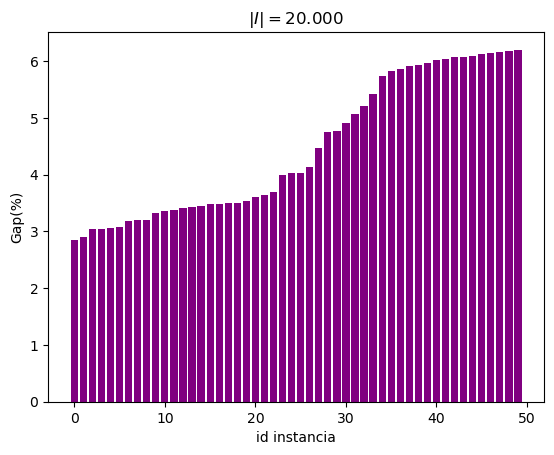

In [48]:
#Gaps de Z vs Baldo, ordenados 
data = 100-(todo[:,0,0]/todo[:,1,0])*100
data.sort()
plt.title(r"$|I| = 20.000$")
plt.ylabel("Gap(%)")
plt.xlabel("id instancia")
plt.bar(range(len(data)),data,color="purple")

print(f"Intervalos Gap minimo: {np.min(data)}")
print(f"Intervalos Gap maximo: {np.max(data)}")
print(f"Intervalos Gap medio: {np.mean(data)}")
print(f"Intervalos Gap std: {np.std(data)}")


([<matplotlib.axis.XTick at 0x7f5119651790>,
 [Text(1, 0, '$\\tau = 0.05$'), Text(2, 0, 'BaldoML')])

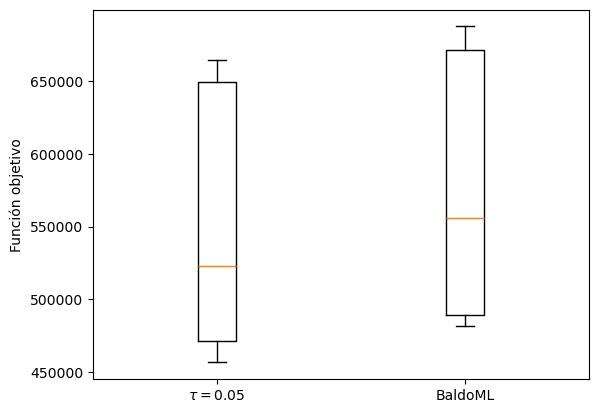

Total de tiempos de ejecucion de Z 1064.0196239948273 
Media de tiempos de ejecucion de Z 21.280392479896545 
Std de tiempos de ejecucion de Z 1.596676286543425 
Total de tiempos de ejecucion de Baldo 8809.005209684372 
Media de tiempos de ejecucion de Baldo 176.18010419368744 
Std de tiempos de ejecucion de Baldo 164.44950175446934 


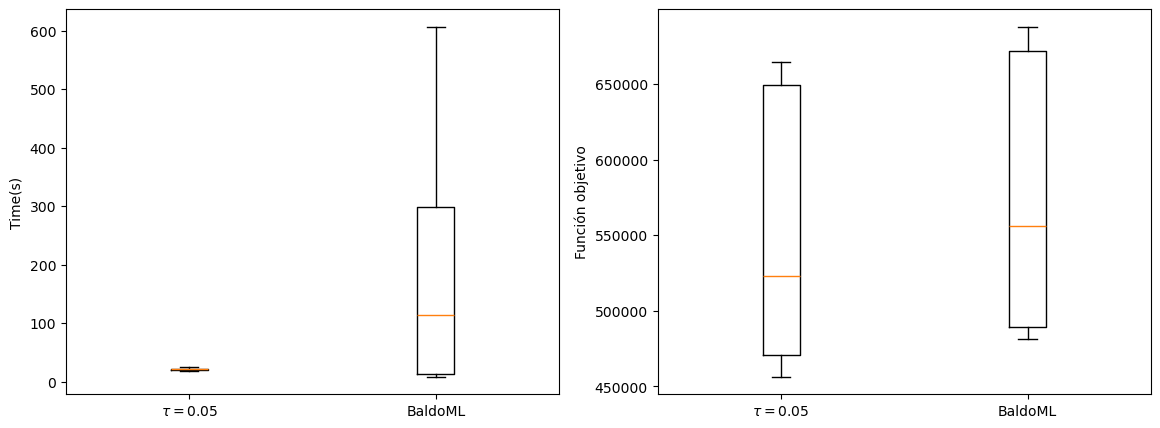

In [71]:
from matplotlib import pyplot as plt
#(Instance,method,of/time)
print(f"Total de tiempos de ejecucion de Z {np.sum(todo[:,0,1])} ")
print(f"Media de tiempos de ejecucion de Z {np.mean(todo[:,0,1])} ")
print(f"Std de tiempos de ejecucion de Z {np.std(todo[:,0,1])} ")

print(f"Total de tiempos de ejecucion de Baldo {np.sum(todo[:,1,1])} ")
print(f"Media de tiempos de ejecucion de Baldo {np.mean(todo[:,1,1])} ")
print(f"Std de tiempos de ejecucion de Baldo {np.std(todo[:,1,1])} ")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

axes[0].boxplot(todo[:,:,1],showfliers=True)
axes[0].set_ylabel("Time(s)")
axes[0].set_xticks([1,2],[r"$\tau=0.05$","BaldoML"])
#axes[0].set_aspect('equal')
axes[1].boxplot(todo[:,:,0])
axes[1].set_ylabel("Función objetivo")
axes[1].set_xticks([1,2],[r"$\tau = 0.05$","BaldoML"])
#axes[1].set_aspect('equal')